In [1]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *

# sc is an existing SparkContext.
sqlContext = SQLContext(sc)

In [2]:
jsonFile = sqlContext.read.json("swift://notebooks.spark/lobbying.json")

In [3]:
print jsonFile

DataFrame[PublicFilings: struct<#text:string,Filing:array<struct<#tail:string,@AffiliatedOrgsURL:string,@Amount:string,@ID:string,@Period:string,@Received:string,@RegistrationEffectiveDate:string,@TerminationEffectiveDate:string,@Type:string,@Year:string,AffiliatedOrgs:struct<Org:string>,Client:struct<@ClientCountry:string,@ClientID:string,@ClientName:string,@ClientPPBCountry:string,@ClientPPBState:string,@ClientState:string,@ContactFullname:string,@GeneralDescription:string,@IsStateOrLocalGov:string,@SelfFiler:string>,ForeignEntities:struct<Entity:string>,GovernmentEntities:struct<GovernmentEntity:string>,Issues:struct<Issue:string>,Lobbyists:struct<Lobbyist:string>,Registrant:struct<@Address:string,@GeneralDescription:string,@RegistrantCountry:string,@RegistrantID:string,@RegistrantName:string,@RegistrantPPBCountry:string>>>>, _corrupt_record: string]


In [4]:
jsonFile.registerTempTable("lobbyings");

In [5]:
sqlContext.cacheTable("lobbyings")

In [6]:
lobbyings = sqlContext.sql("SELECT * FROM lobbyings")

In [7]:
lobbyings.cache()

DataFrame[PublicFilings: struct<#text:string,Filing:array<struct<#tail:string,@AffiliatedOrgsURL:string,@Amount:string,@ID:string,@Period:string,@Received:string,@RegistrationEffectiveDate:string,@TerminationEffectiveDate:string,@Type:string,@Year:string,AffiliatedOrgs:struct<Org:string>,Client:struct<@ClientCountry:string,@ClientID:string,@ClientName:string,@ClientPPBCountry:string,@ClientPPBState:string,@ClientState:string,@ContactFullname:string,@GeneralDescription:string,@IsStateOrLocalGov:string,@SelfFiler:string>,ForeignEntities:struct<Entity:string>,GovernmentEntities:struct<GovernmentEntity:string>,Issues:struct<Issue:string>,Lobbyists:struct<Lobbyist:string>,Registrant:struct<@Address:string,@GeneralDescription:string,@RegistrantCountry:string,@RegistrantID:string,@RegistrantName:string,@RegistrantPPBCountry:string>>>>, _corrupt_record: string]

In [8]:
lobbyings.printSchema()

root
 |-- PublicFilings: struct (nullable = true)
 |    |-- #text: string (nullable = true)
 |    |-- Filing: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- #tail: string (nullable = true)
 |    |    |    |-- @AffiliatedOrgsURL: string (nullable = true)
 |    |    |    |-- @Amount: string (nullable = true)
 |    |    |    |-- @ID: string (nullable = true)
 |    |    |    |-- @Period: string (nullable = true)
 |    |    |    |-- @Received: string (nullable = true)
 |    |    |    |-- @RegistrationEffectiveDate: string (nullable = true)
 |    |    |    |-- @TerminationEffectiveDate: string (nullable = true)
 |    |    |    |-- @Type: string (nullable = true)
 |    |    |    |-- @Year: string (nullable = true)
 |    |    |    |-- AffiliatedOrgs: struct (nullable = true)
 |    |    |    |    |-- Org: string (nullable = true)
 |    |    |    |-- Client: struct (nullable = true)
 |    |    |    |    |-- @ClientCountry: string (nullable = true

In [9]:
from pyspark.sql.functions import explode

In [10]:
clientState = sqlContext.sql("select lobbyings.PublicFilings.Filing.Client.`@ClientState` as state from lobbyings")

In [11]:
clientState.printSchema()

root
 |-- state: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [12]:
clientState.show()

+--------------------+
|               state|
+--------------------+
|                null|
|List(GEORGIA, , D...|
|List(VIRGINIA, CA...|
|List(DISTRICT OF ...|
|List(NEW JERSEY, ...|
|List(VIRGINIA, VI...|
|List(MISSOURI, DI...|
|List(WASHINGTON, ...|
|List(VIRGINIA, CA...|
|List(CALIFORNIA, ...|
|List(DISTRICT OF ...|
|List(TEXAS, VIRGI...|
|List(, CALIFORNIA...|
|List(TEXAS, FLORI...|
|List(MASSACHUSETT...|
|List(VIRGINIA, SO...|
|List(OKLAHOMA, OK...|
|List(OREGON, DIST...|
|List(DISTRICT OF ...|
|List(CALIFORNIA, ...|
+--------------------+



In [13]:
ClientState_flat = clientState.select(explode(clientState.state))

In [14]:
ClientState_flat.show()

+--------------------+
|                 _c0|
+--------------------+
|             GEORGIA|
|                    |
|DISTRICT OF COLUMBIA|
|                    |
|         PUERTO RICO|
|                    |
|            ILLINOIS|
|DISTRICT OF COLUMBIA|
|           LOUISIANA|
|        PENNSYLVANIA|
|DISTRICT OF COLUMBIA|
|          CALIFORNIA|
|        PENNSYLVANIA|
|DISTRICT OF COLUMBIA|
|             GEORGIA|
|            NEW YORK|
|            VIRGINIA|
|           LOUISIANA|
|           LOUISIANA|
|DISTRICT OF COLUMBIA|
+--------------------+



In [15]:
ClientState_flatGroup = ClientState_flat.groupBy("_c0").count()

In [16]:
ClientState_flat_sorted_df = ClientState_flatGroup.sort(["count"],ascending=False)

In [17]:
ClientState_flat_sorted_df.show()

+--------------------+-----+
|                 _c0|count|
+--------------------+-----+
|DISTRICT OF COLUMBIA|28528|
|          CALIFORNIA| 7250|
|            VIRGINIA| 7113|
|            NEW YORK| 4495|
|                    | 4482|
|               TEXAS| 3848|
|             FLORIDA| 2914|
|            ILLINOIS| 2542|
|        PENNSYLVANIA| 2269|
|            MARYLAND| 2255|
|       MASSACHUSETTS| 2062|
|          NEW JERSEY| 1757|
|                OHIO| 1703|
|          WASHINGTON| 1599|
|             GEORGIA| 1310|
|            COLORADO| 1266|
|      NORTH CAROLINA| 1131|
|            MISSOURI| 1122|
|           MINNESOTA| 1050|
|            MICHIGAN| 1032|
+--------------------+-----+



In [18]:
ClientState_flat_sorted_df = ClientState_flat_sorted_df.filter(ClientState_flat_sorted_df['_c0'] != "")

In [19]:
ClientState_flat_sorted_df.show()

+--------------------+-----+
|                 _c0|count|
+--------------------+-----+
|DISTRICT OF COLUMBIA|28528|
|          CALIFORNIA| 7250|
|            VIRGINIA| 7113|
|            NEW YORK| 4495|
|               TEXAS| 3848|
|             FLORIDA| 2914|
|            ILLINOIS| 2542|
|        PENNSYLVANIA| 2269|
|            MARYLAND| 2255|
|       MASSACHUSETTS| 2062|
|          NEW JERSEY| 1757|
|                OHIO| 1703|
|          WASHINGTON| 1599|
|             GEORGIA| 1310|
|            COLORADO| 1266|
|      NORTH CAROLINA| 1131|
|            MISSOURI| 1122|
|           MINNESOTA| 1050|
|            MICHIGAN| 1032|
|         CONNECTICUT|  974|
+--------------------+-----+



In [20]:
ClientState_flat_sorted_pandas = ClientState_flat_sorted_df.toPandas()
ClientState_flat_sorted_pandas

,_c0,count
0,DISTRICT OF COLUMBIA,28528
1,CALIFORNIA,7250
2,VIRGINIA,7113
3,NEW YORK,4495
4,TEXAS,3848
5,FLORIDA,2914
6,ILLINOIS,2542
7,PENNSYLVANIA,2269
8,MARYLAND,2255
9,MASSACHUSETTS,2062


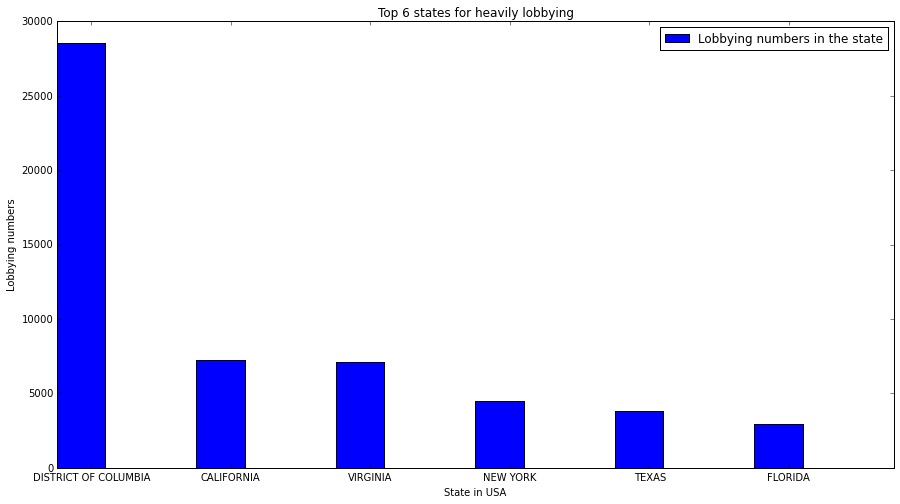

In [21]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ind=np.arange(6)
width = 0.35
bar = plt.bar(ind, ClientState_flat_sorted_pandas["count"][0:6], width, color='b', label = "Lobbying numbers in the state")

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2.5, plSize[1]*2) )
plt.ylabel('Lobbying numbers')
plt.xlabel('State in USA')
plt.title('Top 6 states for heavily lobbying')
plt.xticks(ind+width-0.1, ClientState_flat_sorted_pandas["_c0"][0:6])
plt.legend()

plt.show()

In [22]:
issues = sqlContext.sql("select lobbyings.PublicFilings.Filing.Issues.Issue as issue from lobbyings")

In [23]:
issues.show()

+--------------------+
|               issue|
+--------------------+
|                null|
|List({"@Code":"HE...|
|List({"@Code":"DE...|
|List([{"@Code":"E...|
|List([{"@Code":"T...|
|List([{"@Code":"T...|
|List(null, [{"@Co...|
|List(null, null, ...|
|List({"@Code":"TE...|
|List(null, null, ...|
|List({"@Code":"CO...|
|List([{"@Code":"B...|
|List([{"@Code":"C...|
|List([{"@Code":"F...|
|List([{"@Code":"F...|
|List([{"@Code":"C...|
|List([{"@Code":"E...|
|List([{"@Code":"T...|
|List({"@Code":"VE...|
|List([{"@Code":"T...|
+--------------------+



In [24]:
issue_flat = issues.select(explode(issues.issue))

In [25]:
issue_flat.show()

+--------------------+
|                 _c0|
+--------------------+
|{"@Code":"HEALTH ...|
|                null|
|[{"@Code":"BUDGET...|
|{"@Code":"HEALTH ...|
|{"@Code":"TAXATIO...|
|                null|
|{"@Code":"TELECOM...|
|[{"@Code":"TAXATI...|
|                null|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|                null|
|{"@Code":"FINANCI...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|                null|
|                null|
|                null|
+--------------------+



In [29]:
issue_flat.printSchema()

root
 |-- _c0: string (nullable = true)



In [31]:
print issue_flat.count()

93575


In [33]:
issue_flat.registerTempTable("issue_flat");
sqlContext.cacheTable("issue_flat")
issue_flatNew = sqlContext.sql("SELECT * FROM issue_flat where _c0 not like '[%' and _c0 is not null")

In [34]:
issue_flatNew.show()

+--------------------+
|                 _c0|
+--------------------+
|{"@Code":"HEALTH ...|
|{"@Code":"HEALTH ...|
|{"@Code":"TAXATIO...|
|{"@Code":"TELECOM...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"FINANCI...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"IMMIGRA...|
|{"@Code":"TRADE (...|
|{"@Code":"ENERGY/...|
|{"@Code":"ENERGY/...|
|{"@Code":"ENERGY/...|
|{"@Code":"ENERGY/...|
|{"@Code":"BANKING...|
|{"@Code":"TARIFF ...|
|{"@Code":"LABOR I...|
|{"@Code":"TARIFF ...|
+--------------------+



In [35]:
pandas = issue_flatNew.toPandas()

In [36]:
for index, row in pandas.iterrows():
   row['_c0'] = row['_c0'].split(",")[0].split(":")[1]

In [37]:
print pandas

                                                   _c0
0                                      "HEALTH ISSUES"
1                                      "HEALTH ISSUES"
2                     "TAXATION/INTERNAL REVENUE CODE"
3                                 "TELECOMMUNICATIONS"
4                                        "IMMIGRATION"
5                                        "IMMIGRATION"
6      "FINANCIAL INSTITUTIONS/INVESTMENTS/SECURITIES"
7                                        "IMMIGRATION"
8                                        "IMMIGRATION"
9                                        "IMMIGRATION"
10                                       "IMMIGRATION"
11                          "TRADE (DOMESTIC/FOREIGN)"
12                                    "ENERGY/NUCLEAR"
13                                    "ENERGY/NUCLEAR"
14                                    "ENERGY/NUCLEAR"
15                                    "ENERGY/NUCLEAR"
16                                           "BANKING"
17        

In [38]:
spark_issue = sqlContext.createDataFrame(pandas)

In [39]:
spark_issue.printSchema()

root
 |-- _c0: string (nullable = true)



In [40]:
spark_issueGroup = spark_issue.groupBy('_c0').count()

In [41]:
issue_sorted_df = spark_issueGroup.sort(["count"],ascending=False)

In [42]:
issue_sorted_df.show()

+--------------------+-----+
|                 _c0|count|
+--------------------+-----+
|     "HEALTH ISSUES"| 4538|
|"TAXATION/INTERNA...| 3046|
|"BUDGET/APPROPRIA...| 2801|
|           "DEFENSE"| 2434|
| "MEDICARE/MEDICAID"| 2366|
|    "ENERGY/NUCLEAR"| 1858|
|"FINANCIAL INSTIT...| 1784|
|         "EDUCATION"| 1658|
|    "TRANSPORTATION"| 1563|
|"TRADE (DOMESTIC/...| 1220|
|"TELECOMMUNICATIONS"| 1218|
|"INDIAN/NATIVE AM...| 1019|
|"ENVIRONMENT/SUPE...|  847|
| "GOVERNMENT ISSUES"|  843|
|       "AGRICULTURE"|  820|
|           "BANKING"|  795|
| "NATURAL RESOURCES"|  784|
|"AVIATION/AIRLINE...|  562|
| "FOREIGN RELATIONS"|  561|
|"MARINE/MARITIME/...|  546|
+--------------------+-----+



In [43]:
issue_sorted_pandas = issue_sorted_df.toPandas()

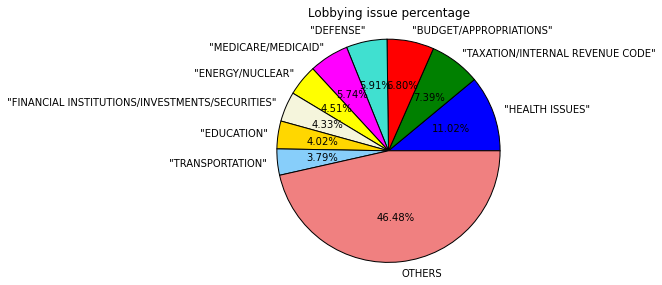

In [45]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

issue_sums = issue_sorted_pandas["count"][0:9]
other_sums = issue_sorted_pandas["count"][9:].sum()
issue_sums[9] = other_sums
issue_index = issue_sorted_pandas["_c0"][:9]
issue_index[9] = "OTHERS"

plt.axis('equal')
plt.title("Lobbying issue percentage",y=1.08)
plt.pie(
    issue_sums,
    labels=issue_index,
    colors=['blue', 'green', 'red', 'turquoise', 'magenta','yellow', "beige", 'gold', 'lightskyblue', 'lightcoral'],
    autopct="%1.2f%%",
    radius=1.25);